In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# First, read the data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/acycliq/spacetx/master/dashboard/data/confusion_matrix/cm_summary/cm_summary.csv')

# use some meaningful column names and drop unwanted columns
data.columns = ['mode', 'groupNonNeurons', 'norm', 'fold', 'xKey', 'alpha', 'yKey', 'beta', 'val']
data = data[['mode', 'groupNonNeurons', 'norm', 'fold', 'alpha', 'beta', 'val']]

# Set now the filter

In [3]:
fold = 0                # possible values: 0,1,2,3
groupNonNeurons = True  # either True or False (boolean)
norm = 'mean'           # either 'mean' or 'median'
mode = 'constrained'    # either 'constrained' or 'unconstrained'

### small function to help us slice the data

In [4]:
def select(data, arg):
    '''
    Convenience function that simply filters a dataframe. 
    
    Parameters: 
    arg: List passing-in the user-specified fold level, norm, mode and groupNonNeurons in that specific order
    
    Returns:
    out: A dataframe filtered by the arg that is passed-in
    
    Example:
    select(data, [0, 'median', 'unconstrained', False]) returns a dataframe containing the median value across the diagonal of the confusion matrix
    for a range of values for alpha and beta and when everything else matches the supplied filter.
    
    
    '''
    fold = arg[0]
    norm = arg[1]
    mode = arg[2]
    groupNonNeurons = arg[3]
    
    df = data[(data['fold']==fold) & (data['groupNonNeurons'] == groupNonNeurons) & (data['norm'] == norm) & (data['mode'] == mode)]
    out = df.pivot(index='alpha', columns='beta', values='val')
    return out

# Slice the data, keep only what we want to visualise

In [5]:
data0 = select(data, [0, 'mean', 'constrained', True])
data1 = select(data, [1, 'mean', 'constrained', True])
data2 = select(data, [2, 'mean', 'constrained', True])
data3 = select(data, [3, 'mean', 'constrained', True])

# Do now the plot

Text(0.5,1,'Fold = 3')

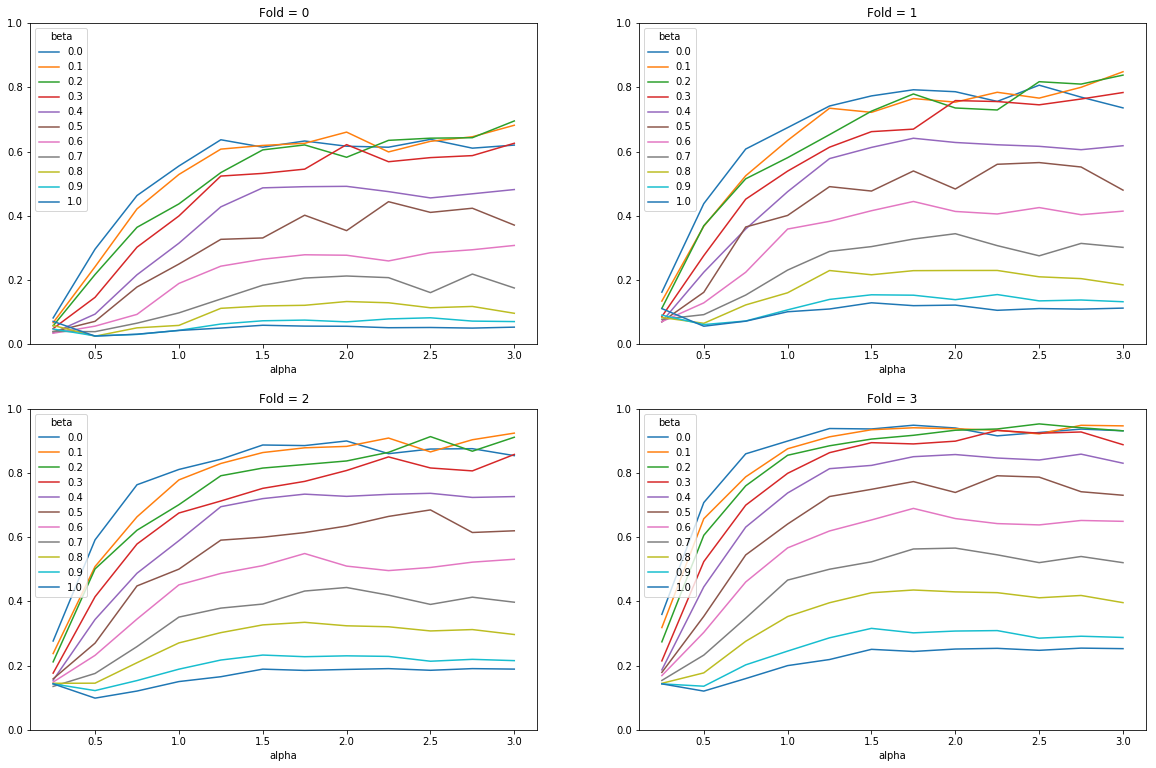

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,13))
plt.grid(True)

data0.plot(ax=axes[0,0]).set_ylim([0, 1])
axes[0,0].set_title('Fold = 0')
data1.plot(ax=axes[0,1]).set_ylim([0, 1])
axes[0,1].set_title('Fold = 1')
data2.plot(ax=axes[1,0]).set_ylim([0, 1])
axes[1,0].set_title('Fold = 2')
data3.plot(ax=axes[1,1]).set_ylim([0, 1])
axes[1,1].set_title('Fold = 3')